In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [4]:
# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
city_data.shape

(120, 3)

In [6]:
ride_data = pd.read_csv(ride_data_to_load)
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [7]:
ride_data.shape

(2375, 4)

In [8]:
# Combine the data into a single dataset
merged_data = ride_data.merge(city_data, how='outer')
# Display the data table for preview
merged_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [9]:
test = merged_data.groupby(['type']).sum()
test

,fare,ride_id,driver_count
type,,,
Rural,4327.93,580968240341287,537
Suburban,19356.33,3106884522576766,8570
Urban,39854.38,7919412664056093,59602


In [10]:
merged_data['driver_count'].sum()

68709

In [11]:
drivers_test = merged_data.groupby(['city']).first()
driver_sum_per_city = drivers_test['driver_count'].sum()
driver_sum_per_city

2973

In [12]:
drivers_test.groupby(['type']).sum()

,fare,ride_id,driver_count
type,,,
Rural,630.03,67753078818543,78
Suburban,1121.80,173788339837996,490
Urban,1616.57,297566087300087,2405


## Bubble Plot of Ride Sharing Data

In [14]:
city_group = merged_data.groupby(['city']).agg({'type':'first','driver_count':'sum','fare':'mean','ride_id':'nunique'})
city_group.rename(columns={'type':"City Type","fare":"Average Fare ($)","ride_id":"Total Number of Rides (Per City)"},inplace=True)
city_group.head()

,City Type,driver_count,Average Fare ($),Total Number of Rides (Per City)
city,,,,
Amandaburgh,Urban,216,24.641667,18
Barajasview,Urban,572,25.332273,22
Barronchester,Suburban,176,36.422500,16
Bethanyland,Suburban,396,32.956111,18
Bradshawfurt,Rural,70,40.064000,10


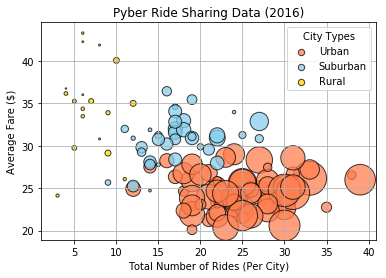

In [15]:
# Obtain the x and y coordinates for each of the three city types
# Set variable to get each individual city type
city_urban = city_group['City Type']== 'Urban'
city_suburban = city_group['City Type']== 'Suburban'
city_rural = city_group['City Type']== 'Rural'

# Build each dataframe for each city type
city_urban_df = city_group[city_urban]
city_suburban_df = city_group[city_suburban]
city_rural_df = city_group[city_rural]

# Set the variables (x, y and z cordinates) for each city type
x_urb = city_urban_df['Total Number of Rides (Per City)']
y_urb = city_urban_df["Average Fare ($)"]
z_urb = city_urban_df["driver_count"]
x_sub = city_suburban_df['Total Number of Rides (Per City)']
y_sub = city_suburban_df["Average Fare ($)"]
z_sub = city_suburban_df["driver_count"]
x_rural = city_rural_df['Total Number of Rides (Per City)']
y_rural = city_rural_df["Average Fare ($)"]
z_rural = city_rural_df["driver_count"]

# Plot each city type coordinating colors to relevant city type
plt.scatter(x_urb, y_urb, z_urb/2, alpha=0.75, edgecolors="k", color='Coral')
plt.scatter(x_sub, y_sub, z_sub/2, alpha=0.75, edgecolors="k", color='skyblue')
plt.scatter(x_rural, y_rural,z_rural/2, alpha=0.75, edgecolors="k", color='Gold')

# Title, xlabel and ylabel for scatterplot
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
# Build the legend and place it upper righthand corner
lgnd = plt.legend(["Urban", "Suburban", "Rural"], loc=1, title="City Types", markerscale=.5)
# Set the size of the legends the same for all city types
lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [40]
lgnd.legendHandles[2]._sizes = [40]
# Set grid and show scatterplot
plt.grid()
plt.show()

## Total Fares by City Type

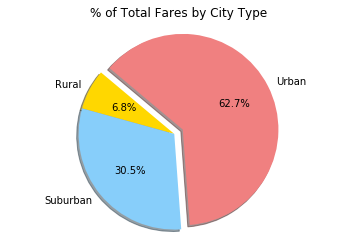

In [16]:
# Calculate Type Percents
# Sum the entire 'fare' series to get a denominator
fare_sum = merged_data["fare"].sum()
# Group by type and sum each of the types
fare_group = merged_data.groupby(["type"]).sum()/fare_sum


# Build Pie Chart
# Variables to be used in charting
colors = ["gold",'lightskyblue', 'lightcoral']
labels = ['Rural', 'Suburban', 'Urban']
explode = (0, 0, 0.1)

#Setting up the pie chart
plt.pie(fare_group['fare'], explode=explode, colors=colors, autopct="%1.1f%%", 
        shadow=True, labels=labels, startangle=140)

# Set axis to equal for so the pie looks good
plt.axis("equal")
# Set a title
plt.title('% of Total Fares by City Type')


# Save Figure
plt.savefig("Percent_of_Total_Fares_by_City_Type_Pie_Chart.png")
plt.show()

## Total Rides by City Type

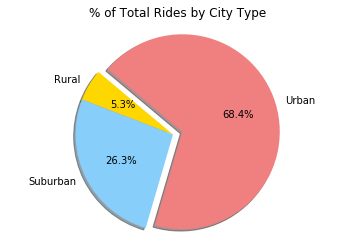

In [17]:
# Calculate Ride Percents
# Count total rides for ALL differnt city types for my denominator
total_type_count = merged_data["type"].count()
# Count total rides for EACH city type divide by total calculated above set in a variable to pie chart
types_group = merged_data.groupby(["type"]).count()/total_type_count


# Build Pie Chart
# Variables to be used in charting
colors = ["gold",'lightskyblue', 'lightcoral']
labels = ['Rural', 'Suburban', 'Urban']
explode = (0, 0, 0.1)

#Setting up the pie chart
plt.pie(types_group['city'],explode=explode, colors=colors, autopct="%1.1f%%", 
        shadow=True, labels=labels, startangle=140)

# Set axis to equal for so the pie looks good
plt.axis("equal")
# Set a title
plt.title("% of Total Rides by City Type")


# Save Figure
plt.savefig("Percentage_of_Total_Rides_by_City_Type_Pie_Chart.png")

# Show Figure
plt.show()



## Total Drivers by City Type

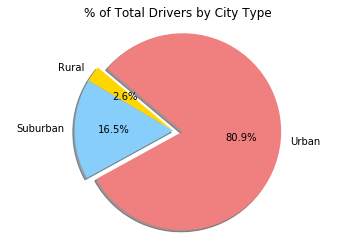

In [18]:
# Calculate Driver Percents
# Group by city so every driver in the city is only counted once, return "first" otherwise number is just repeated
drivers_test = merged_data.groupby(['city']).first()
#Sum all the drivers for all the cities for a total for my denominator to get a perentage 
driver_sum_per_city = drivers_test['driver_count'].sum()
#Group by again to get how many drivers are per city type
total_drives_per_city = drivers_test.groupby(['type']).sum()
#Calculate a series for my answer
percent_tot_drive_by_city_type = total_drives_per_city['driver_count']/driver_sum_per_city

# Build Pie Charts
# Setting the variables for the pie chart
colors = ["gold",'lightskyblue', 'lightcoral']
labels = ['Rural', 'Suburban', 'Urban']
explode = (0, 0, 0.1)

plt.pie(percent_tot_drive_by_city_type,explode=explode, colors=colors, autopct="%1.1f%%", 
        shadow=True, labels=labels, startangle=140)

# Set axis to equal for so the pie looks good
plt.axis("equal")
# Set a title
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Percent_of_Total_Drivers_by_City_Type.png")
plt.show()